![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

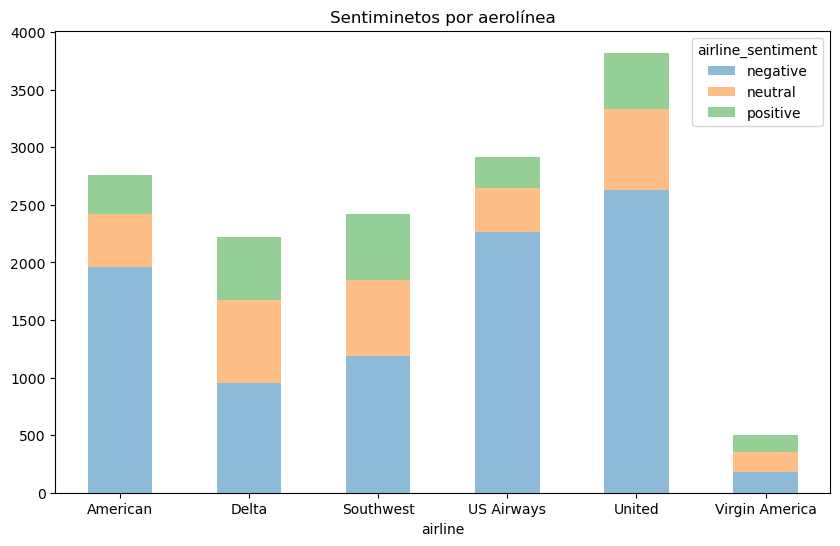

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7711092715231788


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
from nltk.corpus import stopwords

# Descargar las stopwords 
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Convertir a una lista
stop_words_list = list(stop_words)

# Tokenización usando CountVectorizer y eliminación de stopwords
vectorizer = CountVectorizer(stop_words=stop_words_list)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariaalejandraherrera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.7611754966887417


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariaalejandraherrera/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
# Celda 3

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Descargar nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# función para lematizar texto 
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word, pos='v') for word in tokens if word.lower() not in stop_words]
    return ' '.join(lemmatized_text)

# Lematizar los textos en train y test
X_train_lemmatized = X_train.apply(lemmatize_text)
X_test_lemmatized = X_test.apply(lemmatize_text)

# Tokenización de los textos usando CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_lemmatized)
X_test_vectorized = vectorizer.transform(X_test_lemmatized)

# Entrenamiento del modelo 
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

# Predicción sobre el set de test
y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariaalejandraherrera/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariaalejandraherrera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariaalejandraherrera/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.7684188741721855


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 4
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Separar variables predictoras y  objetivo 
X = tweets['text']
y = tweets['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# función para lematizar texto 
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    return ' '.join(lemmatized_text)

# Aplicar lematización train y test
X_train_lemmatized = X_train.apply(lemmatize_text)
X_test_lemmatized = X_test.apply(lemmatize_text)

# Eliminar stopwords
stop_words = set(stopwords.words('english'))
stop_words_list = list(stop_words)

# Tokenización de los textos usando CountVectorizer y eliminación de stopwords
vectorizer = CountVectorizer(stop_words=stop_words_list)
X_train_vectorized = vectorizer.fit_transform(X_train_lemmatized)
X_test_vectorized = vectorizer.transform(X_test_lemmatized)

# Entrenamiento del modelo 
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariaalejandraherrera/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariaalejandraherrera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariaalejandraherrera/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.7735927152317881


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

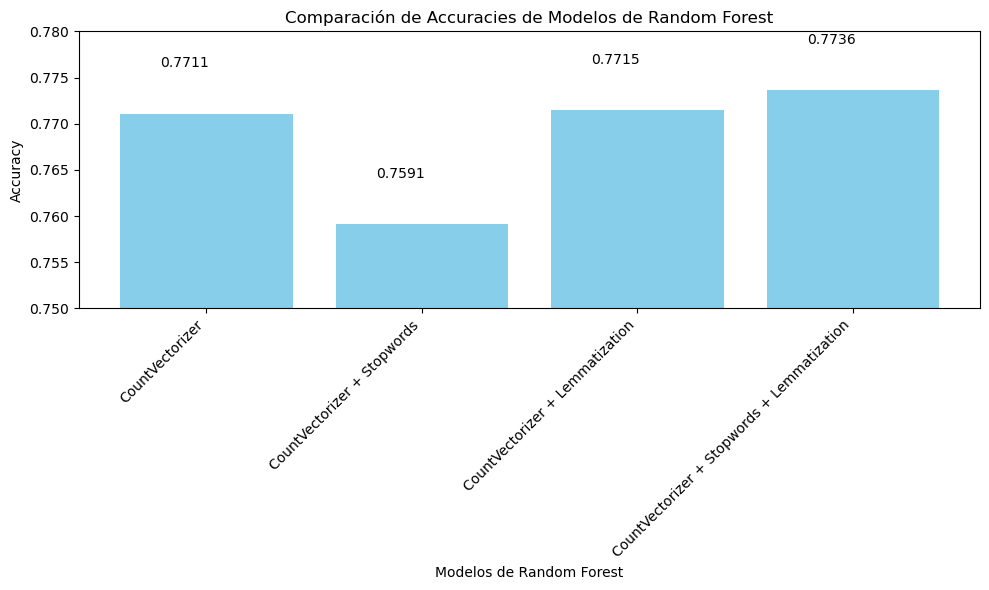

In [16]:
import matplotlib.pyplot as plt

accuracies = [0.7711, 0.7591, 0.7715, 0.7736]
model_names = ['CountVectorizer', 'CountVectorizer + Stopwords', 'CountVectorizer + Lemmatization', 'CountVectorizer + Stopwords + Lemmatization']

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')

plt.xlabel('Modelos de Random Forest')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracies de Modelos de Random Forest')

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, round(acc, 4), ha='center', color='black')

plt.xticks(rotation=45, ha='right')
plt.ylim(0.75, 0.78) 
plt.tight_layout()
plt.show()


- CountVectorizer sin eliminación de stopwords ni lematización: Accuracy = 0.7711
- CountVectorizer con eliminación de stopwords: Accuracy = 0.7591
- CountVectorizer con lematización del texto con verbos: Accuracy = 0.7715
- CountVectorizer con eliminación de stopwords y lematización del texto con verbos: Accuracy = 0.7736

El mejor modelo en términos de accuracy es el cuarto, que utiliza CountVectorizer con eliminación de stopwords y lematización del texto con verbos, con un accuracy de 0.7736. Esta técnica combina la eliminación de palabras sin información significativa (stopwords) y reducción de palabras a su forma base (lematización), lo que puede ayudar a mejorar la calidad de las características extraídas del texto y, por lo tanto, la capacidad predictiva del modelo.

Las ventajas de este mejor modelo son:

Mayor precisión en la predicción del sentimiento de los tweets en comparación con los otros modelos.
Mejor capacidad para capturar la semántica del texto al eliminar stopwords y lematizar el texto con verbos.


Por otro lado, el modelo con el menor desempeño es el segundo, que utiliza CountVectorizer con eliminación de stopwords pero sin lematización, con un accuracy de 0.7591. La desventaja de este modelo es que no realiza la lematización del texto, lo que puede llevar a una pérdida de información semántica y, en consecuencia, a una menor precisión en la predicción del sentimiento de los tweets.